# Modelo Normal

Juan Sosa PhD

Email: jcsosam@unal.edu.co

GitHub: https://github.com/jstats1702

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma
from scipy.stats import norm
from scipy.special import gammaln
from mpl_toolkits.mplot3d import Axes3D
from tabulate import tabulate

# Introducción

El modelo Normal para **variables continuas** $y_i \in \mathbb{R}$, con $i = 1, \dots, n$, se define como:  

$$
\begin{aligned}
	y_i \mid \theta, \sigma^2 &\overset{\text{iid}}{\sim} \textsf{N}(\theta, \sigma^2) \\
	(\theta, \sigma^2) &\sim p(\theta, \sigma^2)
\end{aligned}
$$
donde $\boldsymbol{\theta} = (\theta, \sigma^2) \in \Theta = \mathbb{R} \times \mathbb{R}^+$.

# Estadístico suficiente

**(Ejercicio.)** Si $y_i\mid\theta,\sigma^2\stackrel{\text{iid}}{\sim} \textsf{N}(\theta,\sigma^2)$, para $i=1,\ldots,n$, entonces la **distribución muestral conjunta** de las observaciones es:
$$
p\left(\boldsymbol{y} \mid \theta, \sigma^{2}\right) = \left(2 \pi \sigma^{2}\right)^{-n / 2} \exp { \left\{-\frac{1}{2} \sum_{i=1}^{n}\left(\frac{y_{i}-\theta}{\sigma}\right)^{2}\right\} }\,,
$$
donde $\boldsymbol{y}=(y_1,\ldots,y_n)$.

**(Ejercicio.)** El **núcleo** de esta distribución se puede escribir como:
$$
\sum_{i=1}^n\left(\frac{y_{i}-\theta}{\sigma}\right)^{2}=\frac{1}{\sigma^{2}} \sum_{i=1}^{n} y_{i}^{2}-2 \frac{\theta}{\sigma^{2}} \sum_{i=1}^{n} y_{i}+n \frac{\theta^{2}}{\sigma^{2}}\,,
$$
lo cual sugiere que
$$
\left(\sum_{i=1}^{n} y_{i}, \sum_{i=1}^{n} y_{i}^{2}\right)
$$
es un **estadístico suficiente** para $(\theta,\sigma^2)$. 

**(Ejercicio.)** La media muestral y la varianza muestral $(\bar{y},s^2)$,
$$
\bar{y} = \frac{1}{n}\sum_{i=1}^n y_i\qquad\text{y}\qquad s^2 =\frac{1}{n-1}\left(\sum_{i=1}^n y_i^2 - n\bar{y}^2\right)\,,
$$ 
también constituye un **estadístico suficiente** para $(\theta,\sigma^2)$, dado que
$$
\sum_{i=1}^n(y_i - \theta)^2 = (n-1)s^2 + n(\bar{y} - \theta)^2\,.
$$

# Modelo Normal-Gamma Inversa-Normal

El **modelo Normal-Gamma Inversa-Normal** es
$$
\begin{align*}
	y_i\mid\theta,\sigma^2 &\stackrel{\text{iid}}{\sim} \textsf{N}(\theta,\sigma^2) \\
	\theta \mid \sigma^{2} & \sim \textsf{N}\left(\mu_{0}, \tfrac{\sigma^{2}}{\kappa_{0}}\right) \\
	\sigma^{2} & \sim \textsf{GI}\left(\tfrac{\nu_{0}}{2}, \tfrac{\nu_{0}\,\sigma_{0}^{2}}{2}\right)
\end{align*}
$$
donde $\mu_0$, $\kappa_0$, $\nu_0$ y $\sigma^2_0$ son los hiperparámetros del modelo. Esta parametrización es conveniente para establecer una **interpretación** práctica de los hiperparámetros.

#### Distribución Gamma Inversa

La variable aleatoria $X$ tiene distribución **Gamma Inversa** con parámetros $\alpha,\beta > 0$, i.e., $X\mid\alpha,\beta\sim\textsf{GI}(\alpha,\beta)$, si su función de densidad de probabilidad es
$$
p(x\mid\alpha,\beta) = \frac{\beta^\alpha}{\Gamma(\alpha)}\,x^{-(\alpha+1)}\,e^{-\beta/x}\,,\quad x>0\,.
$$

**(Ejercicio.)** Si $X\sim\textsf{Gamma}(\alpha,\beta)$, entonces $\tfrac{1}{X}\sim\textsf{GI}(\alpha,\beta)$.

In [5]:
def dinvgamma0(x, alpha, beta, log=False):
    """
    Densidad de la distribución Inversa Gamma con parámetros alpha y beta.

    Args:
        x (float or np.array): Punto(s) donde evaluar la densidad.
        alpha (float): Parámetro de forma.
        beta (float): Parámetro de escala.
        log (bool): Si True, retorna el logaritmo de la densidad.

    Returns:
        float or np.array: Densidad evaluada en x (o log-densidad si log=True).
    """
    log_density = alpha * np.log(beta) - gammaln(alpha) - (alpha + 1) * np.log(x) - beta / x

    if log:
        return log_density
    else:
        return np.exp(log_density)

## Distribución posterior

Bajo el **modelo Normal-Gamma Inversa-Normal** se tiene que la **distribución posterior** de $\boldsymbol{\theta}$ es
$$
p(\theta,\sigma^2\mid \boldsymbol{y}) = p(\theta\mid \sigma^2, \boldsymbol{y})\,p(\sigma^2\mid \boldsymbol{y})
$$
donde:

- **(Ejercicio.)** $\theta\mid \sigma^2, \boldsymbol{y} \sim \textsf{N}\left(\theta\mid\mu_{n}, \frac{\sigma^{2}}{\kappa_{n}}\right)$, donde
	$$
	\mu_n = \frac{\kappa_0}{\kappa_n}\mu_0 + \frac{n}{\kappa_n}\bar{y} \qquad\text{con}\qquad \kappa_n = \kappa_0+n\,,
	$$
	dado que 
	$$
	p(\theta\mid\sigma^2,\boldsymbol{y})\propto p(\boldsymbol{y}\mid\theta,\sigma^2)\,p(\theta\mid\sigma^2)\,.
	$$
- **(Ejercicio.)** $\sigma^2\mid \boldsymbol{y} \sim \textsf{GI}\left(\sigma^2\mid\frac{\nu_n}{2},\frac{\nu_n\,\sigma^2_n}{2}\right)$, donde
	$$
	\nu_n = \nu_0+n\qquad\text{y}\qquad \nu_{n}\sigma_{n}^{2} = \nu_{0} \sigma_{0}^{2}+(n-1) s^{2}+n \frac{\kappa_{0}}{\kappa_{n}}\left(\bar{y}-\mu_{0}\right)^2\,,
	$$
	dado que 
	$$
	p(\sigma^2\mid\boldsymbol{y}) \propto p(\sigma^2)\,p(\boldsymbol{y}\mid \sigma^2) = p(\sigma^2)\int_{-\infty}^\infty p(\boldsymbol{y}\mid\theta,\sigma^2)\,p(\theta\mid\sigma^2)\,\text{d}\theta\,.
	$$

Bajo esta parametrización de la distribución previa, se puede interpretar que:

- $\mu_0$ corresponde a la media previa de $\kappa_0$ observaciones previas.
- $\sigma^2_0$ corresponde a la varianza previa de $\nu_0$ observaciones previas.
- $(n-1) s^{2}$, $\nu_{0} \sigma_{0}^{2}$ y $\nu_{n} \sigma_{n}^{2}$ son las sumas de cuadrados muestral, previa, y posterior, respectivamente.
- ¿Qué ocurre si $\kappa_0\rightarrow 0$ y $\nu_0\rightarrow 0$?


## Distribuciones marginales

**(Ejercicio.)** Las **distribuciones marginales posteriores** de $\theta$ y $\sigma^2$ son respectivamente:
$$
\theta\mid \boldsymbol{y}   \sim  \textsf{t}_{\nu_n}\left( \mu_n,\tfrac{\sigma^2_n}{\kappa_n} \right)
\qquad\text{y}\qquad
\sigma^2\mid \boldsymbol{y} \sim  \textsf{GI}\left(\tfrac{\nu_n}{2},\tfrac{\nu_n\,\sigma^2_n}{2}\right)\,,
$$
donde $\textsf{t}_\nu(\mu,\sigma^2)$ es la distribución $\textsf{t}$ con $\nu$ grados de libertad, media $\mu$, y varianza $\tfrac{\nu}{\nu-2}\,\sigma^2$.

#### Distribución t

La variable aleatoria $X$ tiene distribución **t** con $\nu\in\mathbb{N}_0$ (grados de libertad), $\mu\in\mathbb{R}$ (localización), y $\sigma\in\mathbb{R}^+$ (escala), i.e., $X\mid\nu,\mu,\sigma^2\sim\textsf{t}_\nu(\mu,\sigma^2)$, si su función de densidad de probabilidad es
$$
p(x\mid\nu,\mu,\sigma^2) = \frac{\Gamma((\nu+1)/2)}{\Gamma(\nu/2)\sqrt{\nu\pi\sigma^2}}\,\left( 1 + \tfrac{1}{\nu\sigma^2}\,( x-\mu )^2 \right)^{-(\nu + 1 )/2} \,,\quad x>0\,.
$$

**(Ejercicio.)** Si $X\sim\textsf{t}_\nu(\mu,\sigma^2)$, entonces $\tfrac{X-\mu}{\sigma}\sim\textsf{t}_\nu$.

In [7]:
def dt0(x, nu, mu, sigma2, log=False):
    """
    Densidad de la distribución t escalada y trasladada: t(ν, μ, σ²)

    Args:
        x (float or np.array): Punto(s) donde evaluar la densidad.
        nu (float): Grados de libertad.
        mu (float): Media (ubicación).
        sigma2 (float): Varianza (escala).
        log (bool): Si True, retorna el logaritmo de la densidad.

    Returns:
        float or np.array: Densidad evaluada en x (o log-densidad si log=True).
    """
    log_const = gammaln((nu + 1) / 2) - gammaln(nu / 2) - 0.5 * np.log(nu * np.pi * sigma2)
    log_kernel = -((nu + 1) / 2) * np.log(1 + ((x - mu) ** 2) / (nu * sigma2))
    log_density = log_const + log_kernel

    if log:
        return log_density
    else:
        return np.exp(log_density)

## Predicción

**(Ejercicio.)** La **distribución predictiva posterior** de una observación futura $y^*\in\mathbb{R}$ es
$$
y^*\mid\boldsymbol{y} \sim \textsf{t}_{\nu_n}\left( \mu_n,\tfrac{\kappa_n+1}{\kappa_n}\,\sigma^2_n \right)
$$

# Previa impropia

La función $p(\theta,\log\sigma^2)\propto 1$ se denomina **distribución previa impropia**.

Esta "distribución" es equivalente a $p(\theta,\sigma^2)\propto 1/\sigma^2$ y se llama **impropia** porque no corresponde a una función de densidad de probabilidad.

Lo esencial es que la distribución posterior obtenida al utilizar una distribución previa impropia sí sea una distribución de probabilidad propia.

Una previa impropia permite realizar análisis sin imponer una información previa específica, lo que refleja una **postura máxima incertidumbre** (estado de información neutral que **minimiza la subjetividad**).

**(Ejercicio.)** La **distribución posterior** satisface que
$$
\theta\mid\sigma^2,\boldsymbol{y} \sim\textsf{N}\left(\bar{y},\tfrac{\sigma^2}{n}\right)
\qquad\text{y}\qquad
\sigma^2\mid\boldsymbol{y} \sim \textsf{GI}\left(\tfrac{n-1}{2},\tfrac{n-1}{2}s^2\right)\,.
$$

**(Ejercicio.)** La **distribución marginal posterior** de $\theta$ es $\theta\mid\boldsymbol{y}\sim\textsf{t}_{n-1}\left(\bar{y},\tfrac{s^2}{n}\right)$, de donde
$$
\frac{\theta-\bar{y}}{s/\sqrt{n}}\,\Big|\,\boldsymbol{y} \sim\textsf{t}_{n-1}\,.
$$

# Error cuadrático medio

Un **estimador puntual** $\hat{\theta}$ de un parámetro desconocido $\theta$ es una función que aplica $y_1,\ldots,y_n$ a un único elemento del espacio de parámetros $\Theta$.

Las **propiedades muestrales** de $\hat{\theta}$ se refiere al comportamiento de $\hat{\theta}$ bajo una sucesión infinita de **procesos de observación hipotéticos**.

Para el modelo Normal, sea $\hat{\theta}_{\text{u}} = \bar{y}$ el estimador de **máxima verosimilitud** de $\theta$, y sea $\hat{\theta}_{\text{b}} = (1-\omega)\mu_0 + \omega \bar{y}$ el **estimador Bayesiano** de $\theta$ basado en la media posterior bajo la previa Normal-Gamma Inversa.

Si el valor verdadero de $\theta$ es $\theta_0$, entonces
$$
\textsf{E}(\hat{\theta}_{\text{u}}) = \theta_0
\qquad\text{y}\qquad
\textsf{E}(\hat{\theta}_{\text{b}}) =  (1-\omega)\mu_0 + \omega \theta_0\,.
$$
Por lo tanto, $\hat{\theta}_{\text{u}}$ es un **estimador insesgado** de $\theta$, y $\hat{\theta}_{\text{b}}$ es un **estimador sesgado** de $\theta$ a menos que $\mu_0 = \theta_0$.

Para evaluar qué tan "cercano" se encuentra $\hat{\theta}$ de $\theta_0$, se acostumbra usar el **error cuadrático medio** (MSE; *mean square error*) de  $\hat{\theta}$, dado por
$$
\textsf{MSE}(\hat{\theta}) = \textsf{E}((\hat{\theta} -\theta)^2) = \textsf{Var}(\hat{\theta}) + \textsf{Bias}^2(\hat{\theta})\,,
$$
donde $\textsf{Bias}(\hat{\theta}) = \textsf{E}(\hat{\theta}) - \theta_0$ es el **sesgo** (*bias*) de $\hat{\theta}$.

**Ejercicio.** En este caso, se tiene que
$$
\textsf{MSE}(\hat{\theta}_{\text{u}}) = \frac{\sigma^2}{n}
\qquad\text{y}\qquad
\textsf{MSE}(\hat{\theta}_{\text{b}}) = \omega^2\,\frac{\sigma^2}{n} + (1-\omega)^2(\mu_0-\theta_0)^2\,,
$$
y además, $\textsf{MSE}(\hat{\theta}_{\text{b}}) < \textsf{MSE}(\hat{\theta}_{\text{u}})$ siempre que
$$
(\mu_0-\theta_0)^2 < \left(\tfrac{1}{n} + \tfrac{2}{\kappa_0}\right)\sigma^2\,.
$$
Si se sabe un poco sobre la población, se pueden encontrar valores de $\mu_0$ y $\theta_0$ tales que se cumpla esta desigualdad, en cuyo caso es posible construir un estimador Bayesiano con menor distancia cuadrática promedio a la media de la población en comparación con la media muestral.


# Simulación de muestras de la distribución posterior

Para $b=1,\ldots,B$: 

- Simular $(\sigma^2)^{(b)}\sim \textsf{GI}\left(\frac{\nu_n}{2},\frac{\nu_n\,\sigma^2_n}{2}\right)$.
- Simular $\theta^{(b)} \sim \textsf{N} \left(\mu_{n}, \frac{(\sigma^{2})^{(b)}}{\kappa_{n}}\right)$.

Este procedimiento genera un conjunto de **muestras independientes de la distribución posterior** de la forma
$$
(\theta^{(1)},(\sigma^2)^{(1)}),\ldots,(\theta^{(B)},(\sigma^2)^{(B)})\,,
$$
que se pueden utilizar para caracterizar cualquier aspecto de $p(\theta,\sigma^2\mid \boldsymbol{y})$, $p(\theta\mid \boldsymbol{y})$, y $p(\sigma^2\mid \boldsymbol{y})$.

# Ejemplo: Puntajes de Matemáticas

La base de datos contiene la información de una **muestra aleatoria simple** de los **estudiantes que presentaron la Prueba Saber 11 en 2023-2**. 

La **prueba de matemáticas** está diseñada con una **escala de 0 a 100** (sin decimales), un **puntaje promedio de 50** y una **desviación estándar de 10 puntos**.

¿Existe suficiente evidencia para concluir que el puntaje promedio de Matemáticas de Bogotá es significativamente superior al puntaje promedio preestablecido por la prueba?

Los datos son públicos y están disponibles en este [enlace](https://www.icfes.gov.co/data-icfes/).

## Tratamiento de datos

In [11]:
# Cargar datos
dat = pd.read_csv("SB11_20232_muestra.txt", sep=";", dtype=str)

# Dimensiones del DataFrame
print(dat.shape)

# Distribución de frecuencias de la variable ESTU_DEPTO_RESIDE
print(dat["ESTU_DEPTO_RESIDE"].value_counts())

(5511, 83)
ESTU_DEPTO_RESIDE
BOGOTÁ             776
ANTIOQUIA          758
VALLE              401
CUNDINAMARCA       389
ATLANTICO          342
BOLIVAR            275
SANTANDER          274
CORDOBA            218
MAGDALENA          200
BOYACA             173
TOLIMA             170
CESAR              149
NORTE SANTANDER    147
NARIÑO             145
HUILA              126
CAUCA              126
RISARALDA          125
META               122
SUCRE              107
LA GUAJIRA         100
CALDAS              78
CHOCO               55
CASANARE            53
QUINDIO             45
CAQUETA             42
PUTUMAYO            38
ARAUCA              34
GUAVIARE            15
SAN ANDRES           9
AMAZONAS             8
VICHADA              4
GUAINIA              4
VAUPES               3
Name: count, dtype: int64


In [12]:
# Filtrar datos de Bogotá (código de departamento 11) y extraer la columna PUNT_MATEMATICAS
y = dat.loc[dat["ESTU_COD_RESIDE_DEPTO"] == "11", "PUNT_MATEMATICAS"].astype(float)

# Tamaño de la muestra
n = len(y)
print(n)

# Estadísticos suficientes: media y varianza muestral
yb = np.mean(y)
s2 = np.var(y, ddof=1)  # ddof=1 para varianza muestral (como en R)
print(yb)
print(s2)

776
55.08247422680412
143.8486730961093


## Distribución posterior

In [14]:
# Hiperparámetros
mu0 = 50
k0 = 1
s20 = 10**2
nu0 = 1

# Parámetros de la distribución posterior
kn = k0 + n
nun = nu0 + n
mun = (k0 / kn) * mu0 + (n / kn) * yb
s2n = (nu0 * s20 + (n - 1) * s2 + (k0 * n * (yb - mu0)**2) / kn) / nun

print(kn)
print(nun)
print(mun)
print(s2n)

777
777
55.07593307593307
143.6403088140542


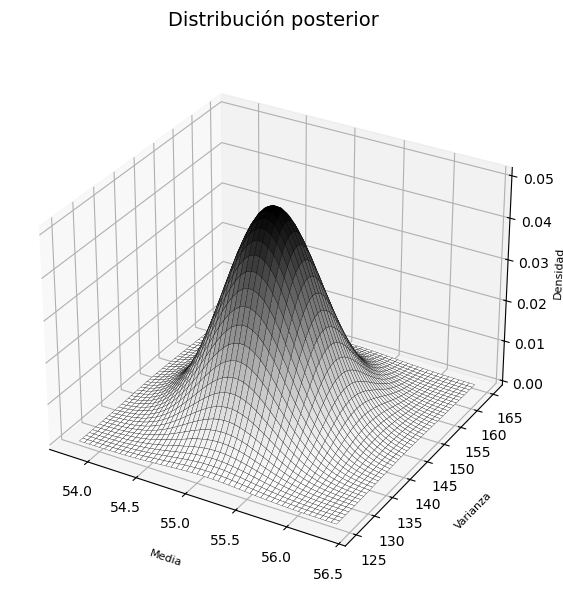

In [15]:
# Función de densidad de la Inversa-Gamma
def dinvgamma(x, a, b, log=False):
    log_density = a * np.log(b) - gammaln(a) - (a + 1) * np.log(x) - b / x
    return log_density if log else np.exp(log_density)

# Rango de valores para theta y sigma2
g = 50
theta = np.linspace(yb - 3 * np.sqrt(s2 / n), yb + 3 * np.sqrt(s2 / n), g)
sigma2 = np.linspace(125, 165, g)

# Evaluar la densidad posterior en escala logarítmica
lp = np.empty((g, g))
for i in range(g):
    for j in range(g):
        log_p_theta = norm.logpdf(theta[i], loc=mun, scale=np.sqrt(sigma2[j] / kn))
        log_p_sigma2 = dinvgamma(sigma2[j], a=nun / 2, b=nun * s2n / 2, log=True)
        lp[i, j] = log_p_theta + log_p_sigma2

# Gráfico 3D de la distribución posterior
Theta, Sigma2 = np.meshgrid(theta, sigma2)
Z = np.exp(lp.T) 

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Theta, Sigma2, Z, cmap='Greys', edgecolor='k', linewidth=0.2)

# Etiquetas de los ejes
ax.set_xlabel("Media",    fontsize=8, labelpad=10)
ax.set_ylabel("Varianza", fontsize=8, labelpad=10)
ax.set_zlabel("Densidad", fontsize=8, labelpad=2)

# Título
ax.set_title("Distribución posterior", fontsize=14, pad=20)

plt.tight_layout()
plt.show()


In [16]:
# Número de simulaciones
B = 10000

# Semilla para reproducibilidad
np.random.seed(1234)

# Muestras de la distribución posterior
sigma2 = 1 / gamma.rvs(a=nun / 2, scale=2 / (nun * s2n), size=B)
theta = norm.rvs(loc=mun, scale=np.sqrt(sigma2 / kn), size=B)

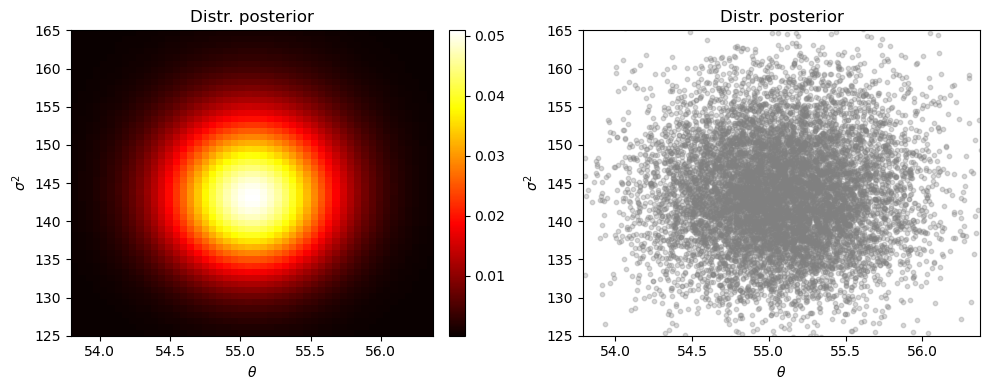

In [17]:
# Rango de valores para gráficos
g = 50
theta_vals = np.linspace(yb - 3 * np.sqrt(s2 / n), yb + 3 * np.sqrt(s2 / n), g)
sigma2_vals = np.linspace(125, 165, g)
xlim_theta = [yb - 3 * np.sqrt(s2 / n), yb + 3 * np.sqrt(s2 / n)]
ylim_sigma2 = [125, 165]

# Distribución posterior: simulaciones
B = 10000
np.random.seed(1234)
sigma2_sim = 1 / gamma.rvs(a=nun / 2, scale=2 / (nun * s2n), size=B)
theta_sim = norm.rvs(loc=mun, scale=np.sqrt(sigma2_sim / kn), size=B)

# Visualización
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Gráfico tipo image()
im = axs[0].imshow(
    np.exp(lp.T),
    extent=[theta_vals[0], theta_vals[-1], sigma2_vals[0], sigma2_vals[-1]],
    origin="lower",
    aspect="auto",
    cmap="hot"
)
axs[0].set_title("Distr. posterior")
axs[0].set_xlabel(r"$\theta$")
axs[0].set_ylabel(r"$\sigma^2$")
fig.colorbar(im, ax=axs[0], fraction=0.046, pad=0.04)

# Gráfico de dispersión de las simulaciones
axs[1].scatter(theta_sim, sigma2_sim, s=10, alpha=0.3, color="gray")
axs[1].set_xlim(xlim_theta)
axs[1].set_ylim(ylim_sigma2)
axs[1].set_title("Distr. posterior")
axs[1].set_xlabel(r"$\theta$")
axs[1].set_ylabel(r"$\sigma^2$")

plt.tight_layout()
plt.show()

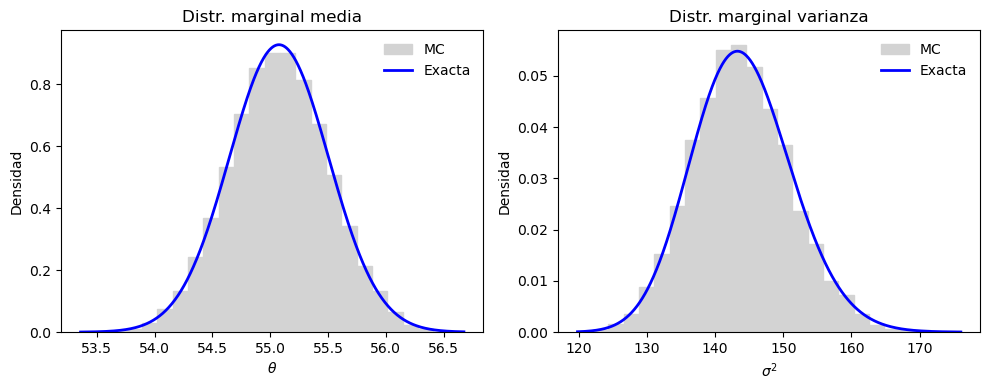

In [18]:
# Crear figura con dos paneles
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Histograma de la marginal de theta
axs[0].hist(theta_sim, bins=25, density=True, color='lightgray', edgecolor='lightgray', label='MC')
x_vals_theta = np.linspace(min(theta_sim), max(theta_sim), 1000)
axs[0].plot(
    x_vals_theta,
    dt0(x_vals_theta, nu=nun, mu=mun, sigma2=s2n / kn, log=False),
    color='blue', lw=2, label='Exacta'
)
axs[0].set_xlabel(r"$\theta$")
axs[0].set_ylabel("Densidad")
axs[0].set_title("Distr. marginal media")

# Histograma de la marginal de sigma²
axs[1].hist(sigma2_sim, bins=25, density=True, color='lightgray', edgecolor='lightgray', label='MC')
x_vals_sigma2 = np.linspace(min(sigma2_sim), max(sigma2_sim), 1000)
axs[1].plot(
    x_vals_sigma2,
    dinvgamma0(x_vals_sigma2, alpha=nun / 2, beta=nun * s2n / 2, log=False),
    color='blue', lw=2, label='Exacta'
)
axs[1].set_xlabel(r"$\sigma^2$")
axs[1].set_ylabel("Densidad")
axs[1].set_title("Distr. marginal varianza")

# Leyenda
for ax in axs:
    ax.legend(loc='upper right', frameon=False)

plt.tight_layout()
plt.show()

In [19]:
# Cálculo de inferencia: media y desviación estándar posterioras
media_theta = np.mean(theta_sim)
cv_theta = np.std(theta_sim, ddof=1) / media_theta
ic_theta = np.quantile(theta_sim, [0.025, 0.975])

media_sd = np.mean(np.sqrt(sigma2_sim))
cv_sd = np.std(np.sqrt(sigma2_sim), ddof=1) / media_sd
ic_sd = np.quantile(np.sqrt(sigma2_sim), [0.025, 0.975])

# Crear tabla como DataFrame
tab_con = pd.DataFrame(
    data = [
        [media_theta, cv_theta, ic_theta[0], ic_theta[1]],
        [media_sd,    cv_sd,    ic_sd[0],    ic_sd[1]]
    ],
    columns = ["Estimación", "CV", "L. Inf. 95%", "L. Sup. 95%"],
    index = ["Media", "DE"]
).round(3)

# Mostrar tabla con formato tipo 'kable'
print(tabulate(tab_con, headers="keys", tablefmt="github", stralign="center", numalign="center"))

|       |  Estimación  |  CV   |  L. Inf. 95%  |  L. Sup. 95%  |
|-------|--------------|-------|---------------|---------------|
| Media |    55.073    | 0.008 |    54.235     |    55.916     |
|  DE   |    11.988    | 0.025 |    11.418     |     12.6      |


## Distribución predictiva

In [21]:
# Distribución predictiva posterior
np.random.seed(1234)
y_new = np.random.normal(loc=theta_sim, scale=np.sqrt(sigma2_sim))

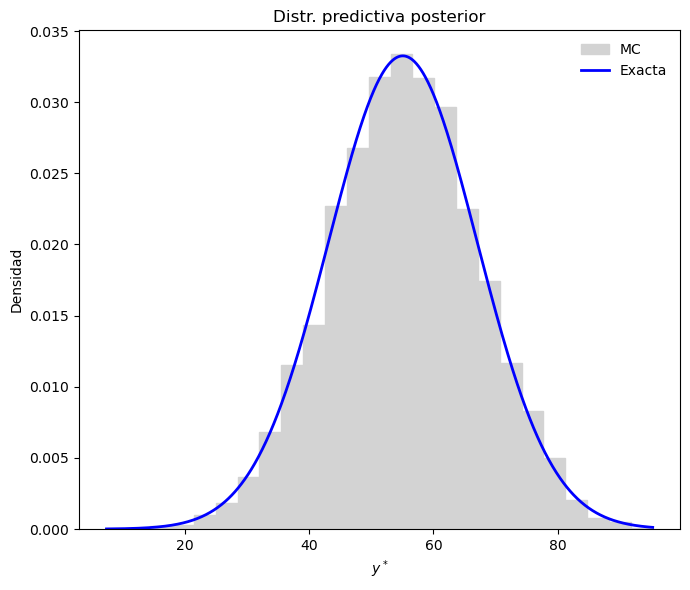

In [22]:
# Crear figura
fig, ax = plt.subplots(figsize=(7, 6))

# Histograma de la distribución predictiva posterior
ax.hist(y_new, bins=25, density=True, color='lightgray', edgecolor='lightgray', label='MC')

# Curva de la distribución predictiva exacta
x_vals = np.linspace(min(y_new), max(y_new), 1000)
ax.plot(
    x_vals,
    dt0(x_vals, nu=nun, mu=mun, sigma2=((kn + 1) / kn) * s2n, log=False),
    color='blue', lw=2, label='Exacta'
)

# Etiquetas y título
ax.set_xlabel(r"$y^*$")
ax.set_ylabel("Densidad")
ax.set_title("Distr. predictiva posterior")

# Leyenda
ax.legend(loc='upper right', frameon=False)

plt.tight_layout()
plt.show()


In [23]:
# Cálculos para la predicción
mean_pred = np.mean(y_new)
cv_pred = np.std(y_new, ddof=1) / mean_pred
ci_pred = np.quantile(y_new, [0.025, 0.975])

# Crear tabla como DataFrame
tab_pred = pd.DataFrame(
    data = [[mean_pred, cv_pred, ci_pred[0], ci_pred[1]]],
    columns = ["Estimación", "CV", "L. Inf. 95%", "L. Sup. 95%"],
    index = ["y pred"]
).round(3)

# Mostrar tabla con formato estilo kable
print(tabulate(tab_pred, headers="keys", tablefmt="github", stralign="center", numalign="center"))

|        |  Estimación  |  CV   |  L. Inf. 95%  |  L. Sup. 95%  |
|--------|--------------|-------|---------------|---------------|
| y pred |    55.266    | 0.216 |    31.934     |    78.473     |


## Chequeo del modelo

In [25]:
# Estadísticos observados
t_obs = [np.mean(y), np.std(y, ddof=1)]

# Inicializar matriz para estadísticas replicadas
t_mc = np.empty((B, 2))

# Semilla para reproducibilidad
np.random.seed(1234)

# Simulación de la distribución predictiva posterior replicada
for i in range(B):
    y_rep = np.random.normal(loc=theta_sim[i], scale=np.sqrt(sigma2_sim[i]), size=n)
    t_mc[i, 0] = np.mean(y_rep)
    t_mc[i, 1] = np.std(y_rep, ddof=1)

# Cálculo de posterior predictive p-values
ppp_media = round(np.mean(t_mc[:, 0] < t_obs[0]), 3)
ppp_sd    = round(np.mean(t_mc[:, 1] < t_obs[1]), 3)

# Mostrar resultados
print(f"ppp para la media: {ppp_media}")
print(f"ppp para la desviación estándar: {ppp_sd}")

ppp para la media: 0.509
ppp para la desviación estándar: 0.507


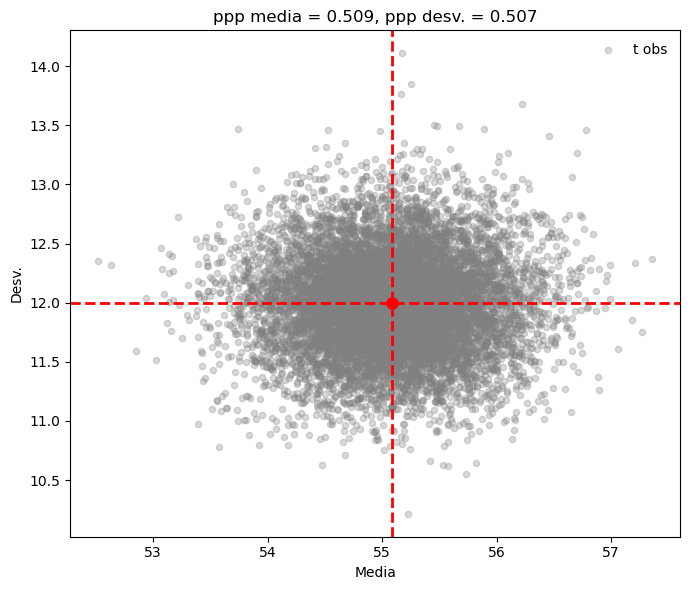

In [26]:
# Crear figura
fig, ax = plt.subplots(figsize=(7, 6))

# Gráfico de dispersión de las estadísticas simuladas
ax.scatter(t_mc[:, 0], t_mc[:, 1], color='gray', alpha=0.3, s=20)

# Líneas de referencia para los estadísticos observados
ax.axvline(t_obs[0], color='red', linestyle='--', linewidth=2)
ax.axhline(t_obs[1], color='red', linestyle='--', linewidth=2)

# Punto observado
ax.plot(t_obs[0], t_obs[1], 'o', color='red', markersize=8)

# Etiquetas y título
ax.set_xlabel("Media")
ax.set_ylabel("Desv.")
ax.set_title(f"ppp media = {ppp_media}, ppp desv. = {ppp_sd}")

# Leyenda
ax.legend(["t obs"], loc="upper right", frameon=False)

plt.tight_layout()
plt.show()

## Inferencia: Bogotá

In [28]:
# Inferencia Bayesiana
est_B = np.mean(theta_sim)
cv_B = np.std(theta_sim, ddof=1) / est_B
ic_B = np.quantile(theta_sim, [0.025, 0.975])

# Inferencia frecuentista: asintótica
est_F1 = yb
cv_F1 = (np.sqrt(s2 / n)) / yb
z = norm.ppf(0.975)
ic_F1 = yb + np.array([-1, 1]) * z * np.sqrt(s2 / n)

# Inferencia frecuentista: bootstrap paramétrico
np.random.seed(123)
out_param = np.mean(np.random.normal(loc=yb, scale=np.sqrt(s2), size=(10000, n)), axis=1)
est_F2 = np.mean(out_param)
cv_F2 = np.std(out_param, ddof=1) / est_F2
ic_F2 = np.quantile(out_param, [0.025, 0.975])

# Inferencia frecuentista: bootstrap no paramétrico
np.random.seed(123)
out_noparam = np.mean(np.random.choice(y, size=(10000, n), replace=True), axis=1)
est_F3 = np.mean(out_noparam)
cv_F3 = np.std(out_noparam, ddof=1) / est_F3
ic_F3 = np.quantile(out_noparam, [0.025, 0.975])

# Armar la tabla
tab = pd.DataFrame(
    data=[
        [est_B,  cv_B,  ic_B[0],      ic_B[1]],
        [est_F1, cv_F1, ic_F1[0],     ic_F1[1]],
        [est_F2, cv_F2, ic_F2[0],     ic_F2[1]],
        [est_F3, cv_F3, ic_F3[0],     ic_F3[1]],
    ],
    columns=["Estimación", "CV", "L. Inf. 95%", "L. Sup. 95%"],
    index=["Bayesiana", "Frec. Asintótica", "Frec. Bootstrap Par.", "Frec. Bootstrap No Par."]
).round(3)

# Mostrar la tabla con formato tipo kable
print(tabulate(tab, headers="keys", tablefmt="github", stralign="center", numalign="center"))

|                         |  Estimación  |  CV   |  L. Inf. 95%  |  L. Sup. 95%  |
|-------------------------|--------------|-------|---------------|---------------|
|        Bayesiana        |    55.073    | 0.008 |    54.235     |    55.916     |
|    Frec. Asintótica     |    55.082    | 0.008 |    54.239     |    55.926     |
|  Frec. Bootstrap Par.   |    55.084    | 0.008 |    54.238     |    55.938     |
| Frec. Bootstrap No Par. |    55.083    | 0.008 |    54.242     |    55.925     |


## Inferencia: Vichada

In [30]:
# Filtrar datos de Vichada (código de departamento 99)
y = dat.loc[dat["ESTU_COD_RESIDE_DEPTO"] == "99", "PUNT_MATEMATICAS"].astype(float)
n = len(y)
yb = np.mean(y)
s2 = np.var(y, ddof=1)

# Hiperparámetros
mu0 = 50
k0 = 1
s20 = 10**2
nu0 = 1

# Parámetros de la distribución posterior
kn = k0 + n
nun = nu0 + n
mun = (k0 * mu0 + n * yb) / kn
s2n = (nu0 * s20 + (n - 1) * s2 + k0 * n * (yb - mu0)**2 / kn) / nun

# Muestras de la distribución posterior
B = 10000
np.random.seed(1234)
sigma2_sim = 1 / gamma.rvs(a=nun / 2, scale=2 / (nun * s2n), size=B)
theta_sim = np.random.normal(loc=mun, scale=np.sqrt(sigma2_sim / kn), size=B)

# Inferencia Bayesiana
est_B = np.mean(theta_sim)
cv_B = np.std(theta_sim, ddof=1) / est_B
ic_B = np.quantile(theta_sim, [0.025, 0.975])

# Inferencia Frecuentista: Asintótica
est_F1 = yb
cv_F1 = (np.sqrt(s2 / n)) / yb
z = norm.ppf(0.975)
ic_F1 = yb + np.array([-1, 1]) * z * np.sqrt(s2 / n)

# Inferencia Frecuentista: Bootstrap Paramétrico
np.random.seed(123)
boot_param = np.mean(np.random.normal(loc=yb, scale=np.sqrt(s2), size=(10000, n)), axis=1)
est_F2 = np.mean(boot_param)
cv_F2 = np.std(boot_param, ddof=1) / est_F2
ic_F2 = np.quantile(boot_param, [0.025, 0.975])

# Inferencia Frecuentista: Bootstrap No Paramétrico
np.random.seed(123)
boot_noparam = np.mean(np.random.choice(y, size=(10000, n), replace=True), axis=1)
est_F3 = np.mean(boot_noparam)
cv_F3 = np.std(boot_noparam, ddof=1) / est_F3
ic_F3 = np.quantile(boot_noparam, [0.025, 0.975])

# Crear tabla de resultados
tab = pd.DataFrame(
    data = [
        [est_B,  cv_B,  ic_B[0],   ic_B[1]],
        [est_F1, cv_F1, ic_F1[0],  ic_F1[1]],
        [est_F2, cv_F2, ic_F2[0],  ic_F2[1]],
        [est_F3, cv_F3, ic_F3[0],  ic_F3[1]]
    ],
    columns = ["Estimación", "CV", "L. Inf. 95%", "L. Sup. 95%"],
    index = ["Bayesiana", "Frec. Asintótico", "Frec. Bootstrap Par.", "Frec. Bootstrap No Par."]
).round(3)

# Mostrar tabla con formato tipo kable
print(tabulate(tab, headers="keys", tablefmt="github", stralign="center", numalign="center"))

|                         |  Estimación  |  CV   |  L. Inf. 95%  |  L. Sup. 95%  |
|-------------------------|--------------|-------|---------------|---------------|
|        Bayesiana        |    37.954    | 0.158 |    26.125     |    49.924     |
|    Frec. Asintótico     |      35      | 0.138 |    25.566     |    44.434     |
|  Frec. Bootstrap Par.   |    35.076    | 0.138 |     25.66     |    44.509     |
| Frec. Bootstrap No Par. |    34.935    | 0.12  |     27.25     |     42.5      |


# Ejercicios conceptuales

- Considere el modelo Normal $x_i\mid\theta,\sigma^2 \overset{\text{iid}}{\sim} \textsf{N}(\theta,\sigma^2)$, para $i=1,\dots,n$, donde $\theta$ es desconocido y $\sigma^2$ es conocido. Además, suponga que la distribución previa de $\theta$ está definida como una mezcla finita de distribuciones normales conjugadas de la forma  
$$
p(\theta) = \sum_{\ell=1}^K \omega_\ell\,\phi(\theta\mid\mu_\ell,\tau^2),
$$  
donde $K$ es un entero positivo fijo con $K \geq 1$, y los coeficientes $\omega_1,\dots,\omega_K$ forman un sistema de pesos que satisface $\sum_{\ell=1}^K \omega_\ell = 1$ y $0\leq w_\ell\leq 1$, para $\ell=1,\dots,K$. Aquí, $\phi(\theta\mid\mu,\tau^2)$ representa la densidad de una distribución Normal con media $\mu$ y varianza $\tau^2$. Este tipo de distribución previa permite representar estados de información previos multimodales sobre $\theta$.  

     a. Determine la distribución posterior de $\theta$.  
     b. Determine la media posterior de $\theta$.  
     c. Determine la distribución predictiva previa $p(y)$.  
     d. Determine la distribución predictiva posterior $p(y \mid \boldsymbol{y})$.

- Considere el modelo Normal Truncado $x_i\mid\theta,\sigma^2 \overset{\text{iid}}{\sim} \textsf{N}_{(0,\infty)}(\theta,\sigma^2)$, para $i=1,\dots,n$, donde $\sigma^2=1$. Además, suponga que la distribución previa de $\theta$ está dada por $\theta\sim\textsf{N}(\mu,\tau^2)$.  

     a. Determine la distribución posterior de $\theta$.  
     b. ¿Se puede considerar este modelo como un modelo conjugado?

- Considere el modelo Normal dado por $y_i\mid\theta,\sigma^2 \overset{\text{iid}}{\sim} \textsf{N}(\theta,\sigma^2)$, con la distribución previa:  
$$
\theta \sim \textsf{N}(\mu_0, \tau^2_0),
\qquad
\sigma^2 \sim \textsf{GI}\left(\frac{\nu_0}{2},\frac{\nu_0\sigma^2_0}{2}\right),
$$  
donde $\mu_0$, $\tau^2_0$, $\nu_0$ y $\sigma^2_0$ son los **hiperparámetros** del modelo. Demuestre que:  

     a. La media marginal de $y_i$ es  
     $$
     \textsf{E}(y_i) = \mu_0.
     $$  
     b. La varianza marginal de $y_i$ es  
     $$
     \textsf{Var}(y_i) = \tau_0^2 + \frac{\nu_0 \sigma_0^2}{\nu_0 - 2}, \quad \text{para } \nu_0 > 2.
     $$  

# Ejercicios prácticos

- Los archivos `school1.dat`, `school2.dat` y `school3.dat` contienen datos sobre el tiempo que los estudiantes de tres colegios dedicaron a estudiar o hacer tareas durante un período de exámenes.  
    a. Explore los datos mediante análisis gráfico y numérico.  
    b. Analice los datos de cada colegio por separado utilizando un modelo Normal con una distribución previa conjugada, donde los hiperparámetros son $\mu_0 = 5$, $\sigma_0^2 = 4$, $\kappa_0 = 1$, y $\nu_0 = 2$. Calcule lo siguiente:  
    - Medias posteriores e intervalos de credibilidad al 95% para la media $\theta$, la desviación estándar $\sigma$ y el coeficiente de variación $\eta = \frac{\sigma}{\mu}$ en cada colegio.  
    - La probabilidad posterior de que $\theta_i < \theta_j < \theta_k$ para las seis permutaciones $\{i, j, k\}$ de $\{1, 2, 3\}$, donde $\theta_i$ representa la media del colegio $i$.  
    - La probabilidad posterior de que $\tilde{y}_i < \tilde{y}_j < \tilde{y}_k$ para las seis permutaciones $\{i, j, k\}$ de $\{1, 2, 3\}$, donde $\tilde{y}_i$ es una muestra de la distribución predictiva posterior del colegio $i$.  
    - La probabilidad posterior de que $\theta_1$ sea mayor que $\theta_2$ y $\theta_3$, y la probabilidad posterior de que $\tilde{y}_1$ sea mayor que $\tilde{y}_2$ y $\tilde{y}_3$.  
     
     c. Grafique la distribución posterior conjunta de $(\theta, \sigma^2)$ para cada colegio.  
     d. Evalúe la bondad de ajuste del modelo en cada colegio utilizando como estadísticos de prueba la media y la desviación estándar.

- En un estudio realizado por W. L. Grogan y W. W. Wirth (1981), se identificaron en las selvas de Brasil dos nuevas variedades de mosquitos picadores (*midges*). Una de ellas, denominada mosquito Apf, es portadora de una enfermedad que puede causar inflamación cerebral y discapacidades permanentes, aunque rara vez es letal. En contraste, la otra variedad, denominada mosquito Af, es inofensiva y actúa como un valioso polinizador. Para diferenciar ambas especies, los investigadores tomaron diversas mediciones taxonómicas de los mosquitos capturados.

  Según los datos reportados en el estudio, se dispone de información sobre la longitud del ala (en milímetros) de $n=9$ individuos de la especie Af. Se desea realizar inferencia sobre la media poblacional $\theta$, considerando que estudios previos sugieren que la longitud promedio de las alas en especies similares es cercana a 1.9 mm, con una desviación estándar de 0.1 mm. Dado que las longitudes son estrictamente positivas, se asume $\theta > 0$. Los datos observados son: $1.64, 1.70, 1.72, 1.74, 1.82, 1.82, 1.82, 1.90, 2.08$. Realice inferencia sobre la media $\theta$, la desviación estándar $\sigma$ y el coeficiente de variación $\eta = \sigma/\theta$ utilizando los siguientes modelos:

    - Modelo Normal con distribución previa conjugado.
    - Modelo Normal con distribución previa impropia.
    - Modelo Normal frecuentista.
    - Bootstrap paramétrico.
    - Bootstrap no paramétrico.
    - Compare los resultados obtenidos bajo cada enfoque.

# Referencias

Hoff, P. D. (2009). ***A First Course in Bayesian Statistical Methods***. Springer New York.

Gelman, A., Carlin, J. B., Stern, H. S., Dunson, D. B., Vehtari, A., & Rubin, D. B. (2013). ***Bayesian Data Analysis*** (3rd ed.). Chapman & Hall/CRC.